In [101]:
import numpy as np
import matplotlib.pyplot as plt

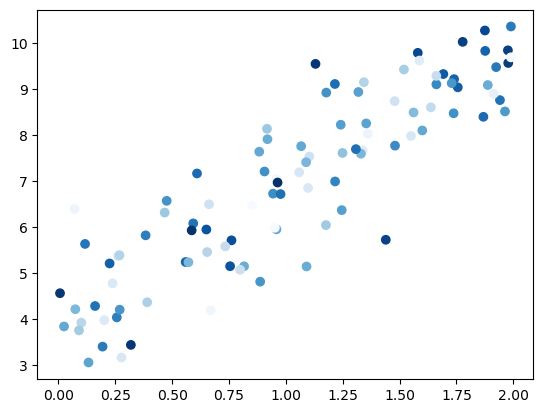

In [102]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
colors = np.random.randint(100, size=100)

plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)

plt.show()

# MSE

In [103]:
# Model Prediction
newX = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(newX.T.dot(newX)).dot(newX.T).dot(y)
theta

array([[3.94121777],
       [2.94380184]])

In [104]:
# Creating a line that fits better to the data
xAxis = np.array([[0], [2]])
xOnes = np.c_[np.ones((2, 1)), xAxis]
yPredict = xOnes.dot(theta)
yPredict

array([[3.94121777],
       [9.82882145]])

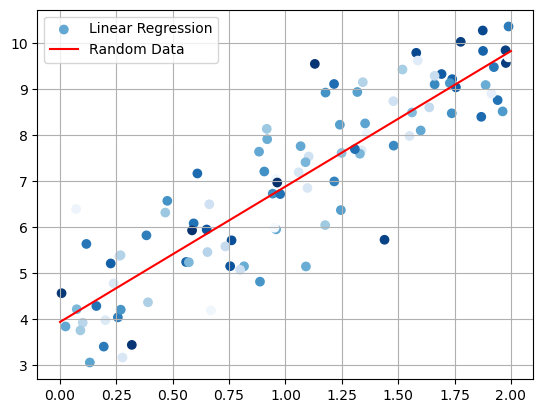

In [105]:
plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)
plt.plot(xAxis, yPredict, color='red', linestyle='-')
plt.legend({'Random Data', 'Linear Regression'})
plt.grid()
plt.show()

In [106]:
# The equivalent code using Scikit-Learn
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)
linReg.intercept_, linReg.coef_

(array([3.94121777]), array([[2.94380184]]))

In [107]:
linReg.predict(xAxis)

array([[3.94121777],
       [9.82882145]])

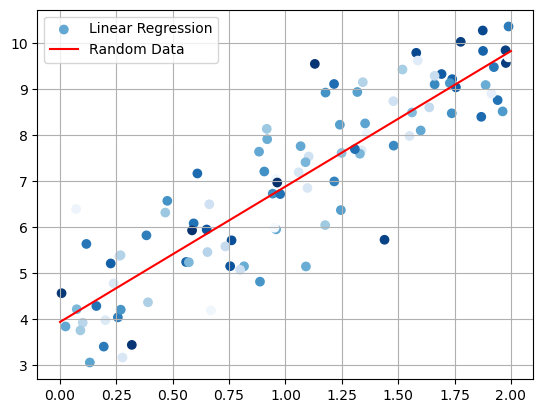

In [108]:
plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)
plt.plot(xAxis, linReg.predict(xAxis), color='red', linestyle='-')
plt.legend({'Random Data', 'Linear Regression'})
plt.grid()
plt.show()

# Batch Gradient Descent

In [109]:
m = 100
eta = 0.01
nIteractions = 1000

theta = [np.array([[0.0], [1.0]])]

for iteraction in range(nIteractions):
    MSEGradient = (2/m)*newX.T.dot(newX.dot(theta[-1]) - y)
    theta.append(theta[-1] - eta * MSEGradient)

theta = np.array(theta).reshape((nIteractions + 1, 2))
yPred = xOnes.dot(theta[-1])

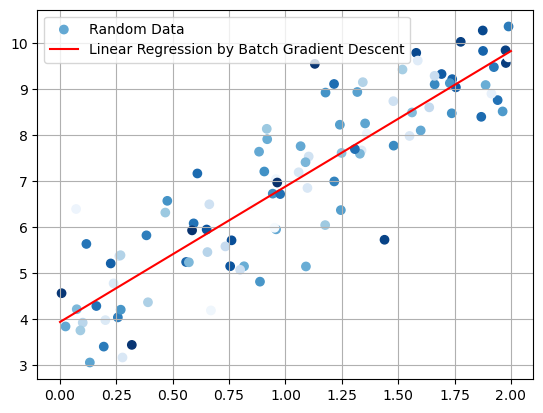

In [110]:
plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)
plt.plot(xAxis, yPredict, color='red', linestyle='-')
plt.legend({'Random Data', 'Linear Regression by Batch Gradient Descent'})
plt.grid()
plt.show()

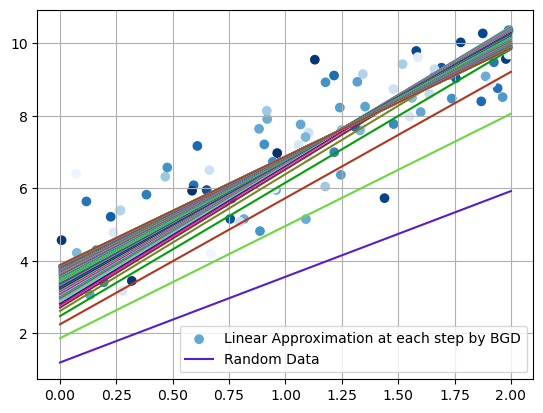

In [124]:
# Studing each step
plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)

eta = 0.1
nIteractions = 100

theta = [np.array([[0.0], [1.0]])]

for iteraction in range(nIteractions):
    r = np.random.rand(1)
    g = np.random.rand(1)
    b = np.random.rand(1)
    MSEGradient = (2/m)*newX.T.dot(newX.dot(theta[-1]) - y)
    theta.append(theta[-1] - eta * MSEGradient)
    yPred = xOnes.dot(theta[-1])
    plt.plot(xAxis, yPred, color=(r[0], g[0], b[0]), linestyle='-')
    
plt.legend({'Random Data', 'Linear Approximation at each step by BGD'})
plt.grid()
plt.show()

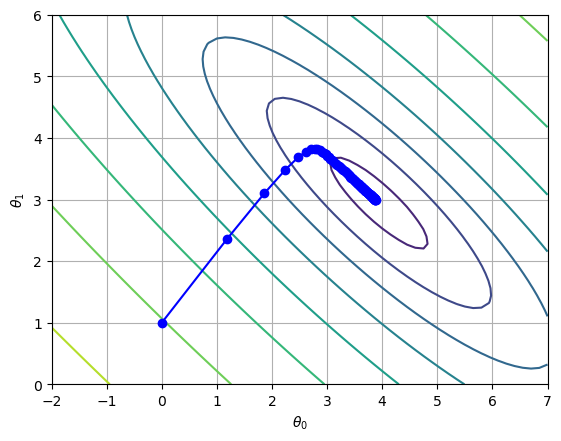

In [131]:
def MSE(theta):
    return np.mean((newX.dot(np.array([[theta[0]], [theta[1]]])) - y) ** 2)

Th0 = np.linspace(-2, 7, num=61)
Th1 = np.linspace(0, 6, num=51)

Z = np.zeros((61, 51))

for i, t0 in enumerate(Th0):
    for j, t1 in enumerate(Th1):
        Z[i, j] = MSE([t0, t1])

theta = np.array(theta).reshape(nIteractions + 1, 2)

plt.contour(Th0, Th1, np.log(Z.T))
plt.plot(theta[:,0], theta[:,1], 'b-o')
plt.xlabel('$\\theta_{0}$')
plt.ylabel('$\\theta_{1}$')
plt.grid()
plt.show()